In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from datetime import *
from imu_video_synch import *
from zurich_move_data_extraction import *
from utilities import *

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Video side Steps
# Convert the video to MP4 for Labelbox 
# Import the metadata from the video
# Extract the exact frame start movement/end movement using Labelbox 
# From these 2 frames: get cutting time
# Trim the video at the exact timestamp -> trimmed_video
# Extract the new number of frames of the trimmed video 
# Get the new start timestamp
# save the trimmed video as MP4 for labelbox 

In [3]:
# Change participant here:
participant_id = 'S004'
path, video_path, imu_path = get_participant_paths(participant_id)
print("Video Path:", video_path)
print("IMU Path:", imu_path)

Video Path: ../CreateStudy\S004\S004.MOV
IMU Path: ../CreateStudy\S004\S004.mat


In [4]:
# Import the metadata from the video
metadata = extract_metadata(video_path)
number_frames, fps, recording_time, creation_time, timestamps = metadata

In [5]:
print(number_frames, fps, recording_time, creation_time, timestamps)

35440 25 1417.6 2023-08-28T13:51:23.000000Z ['2023-08-28 13:51:23.000000' '2023-08-28 13:51:23.040000'
 '2023-08-28 13:51:23.080000' ... '2023-08-28 14:15:00.480000'
 '2023-08-28 14:15:00.520000' '2023-08-28 14:15:00.560000']


In [6]:
creation_time

'2023-08-28T13:51:23.000000Z'

In [7]:
# Use this to find the frames starting/ending the recording 
read_video_frames(video_path)

In [15]:
# Extract the exact frame start movement/end movement using OpenCV  
frame_start = 5965
frame_end = 33966

In [16]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration = get_trimmed_video_timestamps(frame_start, frame_end, timestamps)

In [20]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration

(datetime.datetime(2023, 8, 28, 13, 55, 21, 600000),
 datetime.datetime(2023, 8, 28, 14, 14, 1, 640000),
 datetime.timedelta(seconds=1120, microseconds=40000))

In [21]:
start_trimming_time, end_trimming_time = get_trimming_times(frame_start, frame_end)

In [22]:
# Trim the video at the exact timestamp -> trimmed_video
trimmed_video = trim_video(video_path, start_trimming_time, end_trimming_time, path)
print(f"Trimmed video saved as: {trimmed_video}")

Trimmed video saved as: ../CreateStudy\S004\trimmed_S004.MOV


In [ ]:
# Read the trimmed video
read_video_frames(trimmed_video)

In [23]:
# Convert the trimmed video to MP4 for Labelbox 
converted_trimmed_video = convert_from_mov_to_mp4(trimmed_video, path)

In [24]:
# Extract the new metadat of the trimmed video 
trimmed_number_frames,  trimmed_fps,  trimmed_recording_time, trimmed_creation_time,  trimmed_timestamps = extract_metadata(converted_trimmed_video)
print(trimmed_number_frames, trimmed_fps, trimmed_recording_time, trimmed_creation_time, trimmed_timestamps)

28001 25 1120.04 None None


In [25]:
# Create MP4 videos for Labelbox
# Filenames
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
labelbox_video_LW_filename = participant_id + '_LW.mp4'
labelbox_video_RW_filename = participant_id + '_RW.mp4'

# Paths
trimmed_video_path = os.path.join(path, trimmed_video_filename)
labelbox_video_LW_path = os.path.join(path, labelbox_video_LW_filename)
labelbox_video_RW_path = os.path.join(path, labelbox_video_RW_filename)

# Copy videos
labelbox_video_LW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_LW_path)
labelbox_video_RW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_RW_path)

Video copied: '../CreateStudy\S004\converted_trimmed_S004.MOV.mp4' -> '../CreateStudy\S004\S004_LW.mp4'
Video copied: '../CreateStudy\S004\converted_trimmed_S004.MOV.mp4' -> '../CreateStudy\S004\S004_RW.mp4'


In [26]:
# Extract the new metadat of the trimmed video 
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
trimmed_video_path = os.path.join(path, trimmed_video_filename)
number_frames_trimmed_video,  _,  _, _,  _ = extract_metadata(trimmed_video_path)
print(number_frames_trimmed_video)

28001


In [27]:
output_folder_LW = os.path.join(path, 'splitted_videos_LW')
output_folder_RW = os.path.join(path, 'splitted_videos_RW')
split_video_into_segments(labelbox_video_LW_path,output_folder_LW, trimmed_number_frames)
split_video_into_segments(labelbox_video_RW_path,output_folder_RW, trimmed_number_frames)

Segment 1 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_1.mp4
Segment 2 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_2.mp4
Segment 3 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_3.mp4
Segment 4 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_4.mp4
Segment 5 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_5.mp4
Segment 6 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_6.mp4
Segment 7 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_7.mp4
Segment 8 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_8.mp4
Segment 9 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_9.mp4
Segment 10 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_10.mp4
Segment 11 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_11.mp4
Segment 12 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_12.mp4
Segment 13 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_13.mp4
Segment 14 saved: ../CreateStudy\S004\splitted_videos_LW\S004_LW_14.mp4
Segment 15

In [42]:
# # IMU side Steps
# From the start timestamp and number of frame, extract the new IMU data
# Ensure 2 * trimmed_video_frames = number_sample_IMU
# The starting peak of acceleration should match the start of the new trimmed data 
# The end of the acceleration peak should match the end of the cut


In [43]:
# Define the sensor placements, sensor features, and dataframe features
sensor_placement = ['LW', 'chest', 'RW']
matlab_sensor_features = ['acc', 'gyro', 'quat', 'accHiG', 'magneto', 'press']
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'quat_0', 'quat_1', 'quat_2',
                   'quat_3', 'accHiG_x', 'accHiG_y', 'accHiG_z', 'magneto_x', 'magneto_y', 'magneto_z', 'press']
sensor_9DOF_features = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ',
                       'magnetoX', 'magnetoY', 'magnetoZ']
sensor_acc_features =  ['acc_x', 'acc_y', 'acc_z']


#Extract useful stuff
header = extract_header_data_from_mat_file(imu_path)
sampling_freq =get_sampling_freq(header)
time_array = extract_time_data_from_mat_file(imu_path)
recording_time = get_recording_time(time_array)
dfs = extract_sensors_data_from_mat_file(imu_path, sensor_placement, matlab_sensor_features, sensor_features)
#Usefull export to csv (for SimuLOOP script)
#export_to_csv(file_path, dfs, sensor_placement, matlab_sensor_features, sensor_features)
acc_LW = dfs['LW'][['acc_x', 'acc_y', 'acc_z']]
acc_RW = dfs['RW'][['acc_x', 'acc_y', 'acc_z']]
gyro_LW = dfs['LW'][['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = dfs['RW'][['gyro_x', 'gyro_y', 'gyro_z']]
mag_LW = dfs['LW'][['magneto_x', 'magneto_y', 'magneto_z']]
quat_sensor_LW = dfs['LW'][['quat_0', 'quat_1', 'quat_2','quat_3']]
LW_data = dfs['LW']
RW_data = dfs['RW']
chest_data = dfs['chest']

In [44]:
header

,durationStr,freq,start,startStr,stop,stopStr,tsErrorSensorIDs
0,2 2 m   1 1 s ,50.0,1.693231e+09,2 0 2 3 / 0 8 / 2 8   1 3 : 5 0 : 4 8 . 0 0 0 ,1.693232e+09,2 0 2 3 / 0 8 / 2 8   1 4 : 1 2 : 5 9 . 0 0 0 ,                


In [45]:
IMU_start_timestamp, IMU_end_timestamp = get_datetime_timestamp(header)

2023-08-28 13:50:48.000000 2023-08-28 14:12:59.000000


In [46]:
IMU_start_timestamp

datetime.datetime(2023, 8, 28, 13, 50, 48)

In [47]:
timestamps_array = create_timestamps(IMU_start_timestamp, IMU_end_timestamp, 50)

In [48]:
timestamps_array

,timestamp
0,2023-08-28 13:50:48.000
1,2023-08-28 13:50:48.020
2,2023-08-28 13:50:48.040
3,2023-08-28 13:50:48.060
4,2023-08-28 13:50:48.080
...,...
66546,2023-08-28 14:12:58.920
66547,2023-08-28 14:12:58.940
66548,2023-08-28 14:12:58.960
66549,2023-08-28 14:12:58.980


In [49]:
RW_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,-0.060545,0.029406,-1.946215,-1.337866,1.780084,2.190874,0.661352,-0.724580,-0.015659,0.193268,-0.721002,0.486551,-1.283744,281.400446,248.999183,-111.598886,1003.339990
1,-0.057218,0.025477,-1.942109,-1.386759,1.600923,2.214038,0.659815,-0.726070,-0.015202,0.192962,-0.701235,0.488088,-1.279372,281.399881,249.000219,-111.600298,1003.340003
2,-0.060289,0.022043,-1.964131,-1.304998,1.542405,2.092275,0.658273,-0.727559,-0.014768,0.192658,-0.738714,0.487924,-1.388057,281.400032,248.999941,-111.599920,1003.339999
3,-0.080969,0.027702,-1.959477,-1.238702,1.457650,1.992955,0.656743,-0.729028,-0.014337,0.192357,-0.729840,0.487043,-1.366857,281.399990,249.000016,-111.600021,1003.340000
4,-0.078417,0.042546,-1.908317,-1.230119,1.252313,2.035699,0.655218,-0.730477,-0.013919,0.192091,-0.732176,0.490733,-1.306363,281.400008,248.999996,-111.599994,1003.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66546,-0.137847,0.007768,-1.949296,-0.058802,-0.171649,-0.116429,-0.025033,-0.801868,-0.596502,0.023779,-0.826243,0.487272,-1.319210,276.680307,142.880307,-104.440153,1002.860000
66547,-0.152174,0.021062,-1.949139,-0.002069,0.053247,0.059752,-0.025020,-0.801877,-0.596492,0.023777,-0.780907,0.437089,-1.367393,276.578310,142.778310,-104.389155,1002.860000
66548,-0.150349,0.040004,-1.975177,-0.056164,-0.241589,-0.126681,-0.025034,-0.801871,-0.596498,0.023786,-0.831742,0.438831,-1.366014,276.605858,142.805858,-104.402929,1002.860000
66549,-0.138265,0.025847,-1.929213,0.057155,0.066371,0.012361,-0.025032,-0.801869,-0.596502,0.023777,-0.827464,0.441784,-1.363630,276.598418,142.798418,-104.399209,1002.860000


In [50]:
# Add timestamps to raw data
LW_data = pd.concat([timestamps_array, LW_data], axis=1)
RW_data = pd.concat([timestamps_array, RW_data], axis=1)
chest_data = pd.concat([timestamps_array, chest_data], axis=1)

In [51]:
LW_data

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,2023-08-28 13:50:48.000,0.010723,0.059287,-2.039889,0.368608,0.390453,2.561943,0.906701,-0.362522,-0.215570,-0.001009,-0.587308,0.046779,-2.339857,273.600004,37.799992,1.799975,1008.160000
1,2023-08-28 13:50:48.020,-0.010820,0.055611,-2.035245,0.548383,0.757330,2.686809,0.906134,-0.363652,-0.216052,-0.000595,-0.635030,0.049305,-2.291127,273.599984,37.800031,1.800094,1008.160000
2,2023-08-28 13:50:48.040,0.004281,0.058992,-2.032434,0.432827,2.314597,2.684595,0.905635,-0.364781,-0.216241,-0.000287,-0.635937,0.048682,-2.293250,273.600058,37.799884,1.799651,1008.160001
3,2023-08-28 13:50:48.060,-0.001021,0.067725,-2.081923,0.669134,1.349171,2.743387,0.905120,-0.365905,-0.216496,0.000059,-0.682910,0.048649,-2.291969,273.599783,37.800434,1.801301,1008.159996
4,2023-08-28 13:50:48.080,0.006064,0.068059,-2.035685,0.352336,2.375120,2.682350,0.904604,-0.367065,-0.216690,0.000369,-0.631642,0.049406,-2.294978,273.600809,37.798383,1.795148,1008.160013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66546,2023-08-28 14:12:58.920,-0.012575,0.050757,-2.054752,-0.062213,-0.002416,0.032450,0.003486,0.533208,0.845889,0.012153,-0.636880,0.030488,-2.246082,258.499417,-80.265890,-30.734110,1007.730000
66547,2023-08-28 14:12:58.940,-0.005626,0.064385,-2.037682,-0.079653,-0.209832,0.004899,0.003513,0.533212,0.845887,0.012135,-0.636067,0.008374,-2.235771,258.626952,-80.435935,-30.564065,1007.730000
66548,2023-08-28 14:12:58.960,0.008416,0.049037,-2.057374,-0.007186,0.066615,-0.013650,0.003514,0.533210,0.845888,0.012151,-0.619959,0.079146,-2.281786,258.592778,-80.390371,-30.609629,1007.730000
66549,2023-08-28 14:12:58.980,-0.007585,0.048297,-2.048886,-0.077326,-0.252647,0.022814,0.003529,0.533218,0.845883,0.012153,-0.555075,0.084862,-2.360761,258.601935,-80.402580,-30.597420,1007.730000


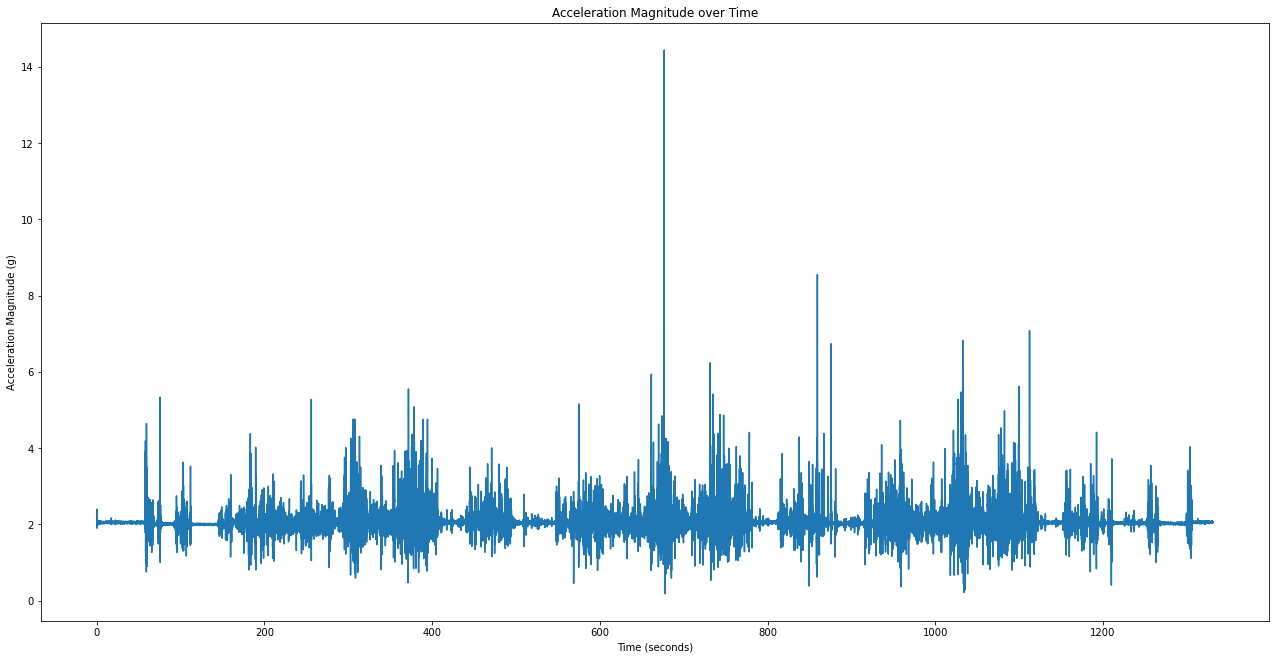

In [52]:
plot_acceleration_magnitude(LW_data,50)

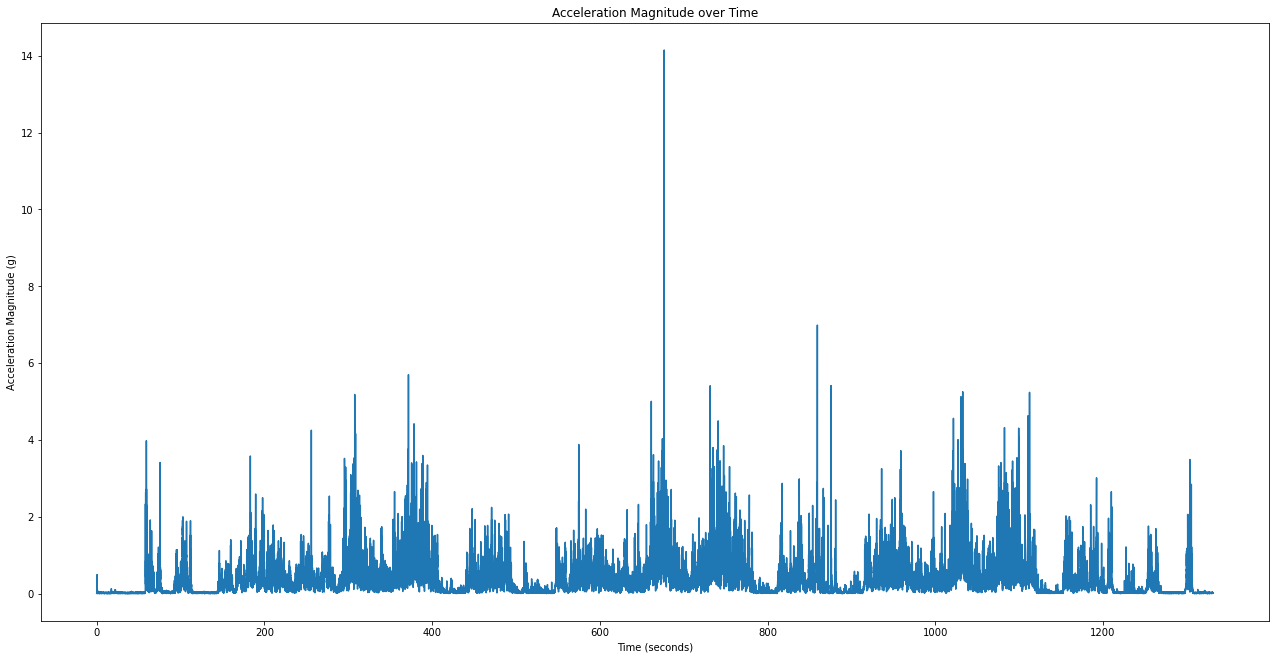

In [53]:
plot_acceleration_magnitude(filter_gravity(LW_data),50)

In [54]:
filtered_LW_data = filter_gravity(LW_data)

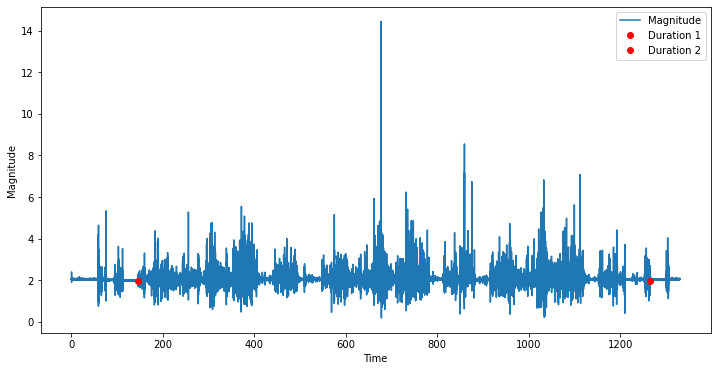

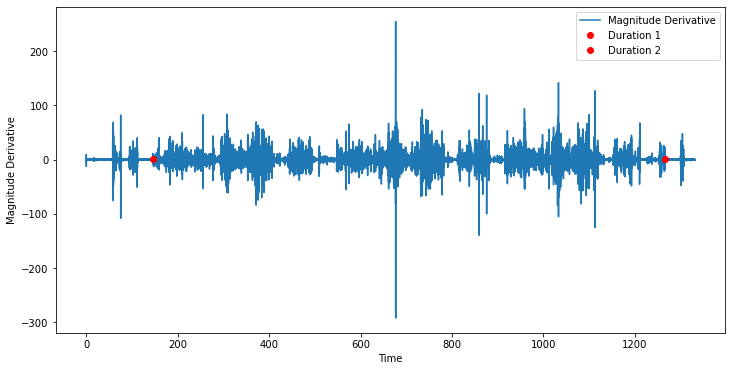

Duration 1: 145.5
Duration 2: 1265.52
Number of Samples: 56002
Number of Video Frames: 28001
Conditions ok


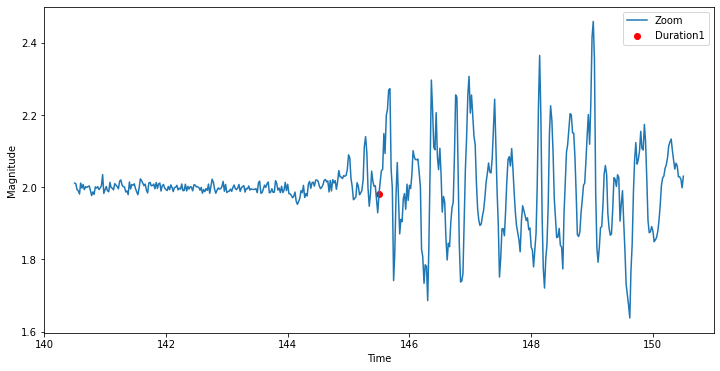

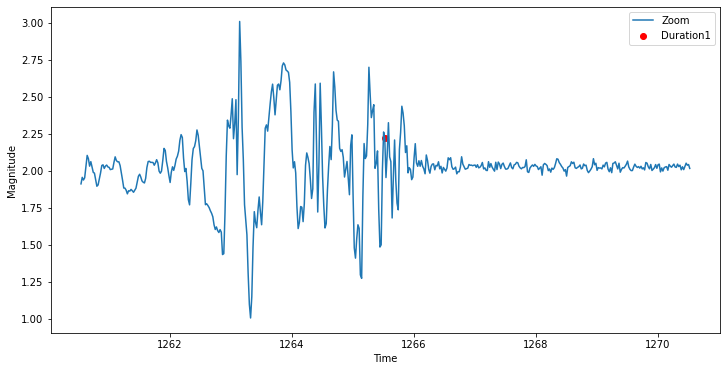

In [63]:
duration1 = 145.5
LW_data,  duration1, duration2 = plot_acceleration_with_timepoints(LW_data, duration1, trimmed_number_frames, trimmed_recording_time)
#LW_data, duration1, duration2 = plot_acceleration_with_timepoints(filtered_LW_data, duration1, trimmed_number_frames, trimmed_recording_time)

In [64]:
LW_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,0 days 00:00:00,2023-08-28 13:50:48.000,0.010723,0.059287,-2.039889,0.368608,0.390453,2.561943,0.906701,-0.362522,-0.215570,-0.001009,-0.587308,0.046779,-2.339857,273.600004,37.799992,1.799975,1008.160000
1,0 days 00:00:00.020000,2023-08-28 13:50:48.020,-0.010820,0.055611,-2.035245,0.548383,0.757330,2.686809,0.906134,-0.363652,-0.216052,-0.000595,-0.635030,0.049305,-2.291127,273.599984,37.800031,1.800094,1008.160000
2,0 days 00:00:00.040000,2023-08-28 13:50:48.040,0.004281,0.058992,-2.032434,0.432827,2.314597,2.684595,0.905635,-0.364781,-0.216241,-0.000287,-0.635937,0.048682,-2.293250,273.600058,37.799884,1.799651,1008.160001
3,0 days 00:00:00.060000,2023-08-28 13:50:48.060,-0.001021,0.067725,-2.081923,0.669134,1.349171,2.743387,0.905120,-0.365905,-0.216496,0.000059,-0.682910,0.048649,-2.291969,273.599783,37.800434,1.801301,1008.159996
4,0 days 00:00:00.080000,2023-08-28 13:50:48.080,0.006064,0.068059,-2.035685,0.352336,2.375120,2.682350,0.904604,-0.367065,-0.216690,0.000369,-0.631642,0.049406,-2.294978,273.600809,37.798383,1.795148,1008.160013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66546,0 days 00:22:10.920000,2023-08-28 14:12:58.920,-0.012575,0.050757,-2.054752,-0.062213,-0.002416,0.032450,0.003486,0.533208,0.845889,0.012153,-0.636880,0.030488,-2.246082,258.499417,-80.265890,-30.734110,1007.730000
66547,0 days 00:22:10.940000,2023-08-28 14:12:58.940,-0.005626,0.064385,-2.037682,-0.079653,-0.209832,0.004899,0.003513,0.533212,0.845887,0.012135,-0.636067,0.008374,-2.235771,258.626952,-80.435935,-30.564065,1007.730000
66548,0 days 00:22:10.960000,2023-08-28 14:12:58.960,0.008416,0.049037,-2.057374,-0.007186,0.066615,-0.013650,0.003514,0.533210,0.845888,0.012151,-0.619959,0.079146,-2.281786,258.592778,-80.390371,-30.609629,1007.730000
66549,0 days 00:22:10.980000,2023-08-28 14:12:58.980,-0.007585,0.048297,-2.048886,-0.077326,-0.252647,0.022814,0.003529,0.533218,0.845883,0.012153,-0.555075,0.084862,-2.360761,258.601935,-80.402580,-30.597420,1007.730000


In [65]:
LW_trimmed_data = trim_data(LW_data, duration1, duration2)
RW_trimmed_data = trim_data(RW_data, duration1, duration2)
chest_trimmed_data = trim_data(chest_data, duration1, duration2)

In [66]:
LW_trimmed_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
7275,0 days 00:02:25.500000,2023-08-28 13:53:13.500,-1.912576,0.268917,-0.440029,-42.625977,6.645687,12.979275,-0.604240,-0.059242,-0.791998,-0.064213,-1.470776,0.065406,-1.360377,262.760277,-93.222451,1.557511,1008.12
7276,0 days 00:02:25.520000,2023-08-28 13:53:13.520,-1.942901,0.254579,-0.472492,-36.909150,8.025556,12.778989,-0.603494,-0.056772,-0.792166,-0.071032,-1.568836,0.193935,-1.419754,262.810641,-92.940413,1.104235,1008.12
7277,0 days 00:02:25.539000,2023-08-28 13:53:13.540,-1.985523,0.319910,-0.372556,-33.006779,8.854316,13.521288,-0.602459,-0.054807,-0.792505,-0.077294,-1.611081,0.093314,-1.412137,262.797150,-93.015961,1.225652,1008.12
7278,0 days 00:02:25.560000,2023-08-28 13:53:13.560,-2.007711,0.352656,-0.209572,-24.318340,9.483791,10.891033,-0.601455,-0.053376,-0.792843,-0.082482,-1.609142,0.154490,-1.355624,262.800763,-92.995725,1.193129,1008.12
7279,0 days 00:02:25.580000,2023-08-28 13:53:13.580,-2.102831,0.248978,-0.362929,-9.607057,13.382448,1.039911,-0.600332,-0.052214,-0.793514,-0.084915,-1.610887,0.194285,-1.269221,262.799796,-93.001145,1.201840,1008.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63272,0 days 00:21:05.440000,2023-08-28 14:11:53.440,-0.459689,-0.451847,-1.337134,24.015612,-1.965448,-11.060539,0.185014,-0.176382,0.965248,-0.054354,-0.913208,0.081136,-2.108467,367.200024,-136.200000,0.000005,1007.72
63273,0 days 00:21:05.460000,2023-08-28 14:11:53.460,-0.496443,-0.227634,-1.396616,7.722226,-11.466720,-2.695102,0.186610,-0.176948,0.964700,-0.056767,-0.790298,-0.086401,-1.941892,367.199899,-136.200003,-0.000024,1007.72
63274,0 days 00:21:05.480000,2023-08-28 14:11:53.480,-0.930591,0.067209,-1.771242,-26.682275,-24.331369,6.015743,0.189654,-0.177118,0.964246,-0.053737,-0.743059,-0.070236,-1.886205,367.200379,-136.199987,0.000091,1007.72
63275,0 days 00:21:05.500000,2023-08-28 14:11:53.500,-1.101539,0.088293,-1.973999,-27.330412,-19.578479,11.709464,0.192787,-0.176539,0.964069,-0.047336,-0.967365,-0.001908,-2.087847,367.198585,-136.200049,-0.000342,1007.72


In [67]:
# Save everything in the correct folder
save_data(path, participant_id, frame_start, frame_end, duration1, LW_trimmed_data, RW_trimmed_data, chest_trimmed_data)

The integers have been saved to the file: '../CreateStudy\S004\S004_video_parameters.txt'
Video parameters saved.
Trimmed data for LW saved to: ../CreateStudy\S004\trimmed_LW_data.csv
Trimmed data for RW saved to: ../CreateStudy\S004\trimmed_RW_data.csv
Trimmed data for chest saved to: ../CreateStudy\S004\trimmed_chest_data.csv
